In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')
print(plt.style.available)

['seaborn-ticks', 'ggplot', 'dark_background', 'bmh', 'seaborn-poster', 'seaborn-notebook', 'fast', 'seaborn', 'classic', 'Solarize_Light2', 'seaborn-dark', 'seaborn-pastel', 'seaborn-muted', '_classic_test', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-bright', 'seaborn-talk', 'seaborn-dark-palette', 'tableau-colorblind10', 'seaborn-darkgrid', 'seaborn-whitegrid', 'fivethirtyeight', 'grayscale', 'seaborn-white', 'seaborn-deep']


In [1]:
#df = pd.read_csv('SampleCSVFile_2kb.csv', encoding = "ISO-8859-1")
df = pd.read_csv('DataHF0.1.csv', encoding = "ISO-8859-1")
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 804 entries, SUBJNO to A1c_quintile
dtypes: float64(24), int64(227), object(553)
memory usage: 132.0+ KB


In [4]:
# df.count() does not include NaN values
#df2 = df[[column for column in df if df[column].count() / len(df) >= 0.9]]
#del df2['BNP_100th']
#print("List of dropped columns:", end=" ")
#for c in df.columns:
#    if c not in df2.columns:
        print(c, end=", ")
#print('\n')
#df = df2

List of dropped columns: BNP_100th, 



In [2]:
df.head()

count    21.000000
mean     70.333333
std      14.115004
min      40.000000
25%      67.000000
50%      72.000000
75%      78.000000
max      92.000000
Name: AGE, dtype: float64


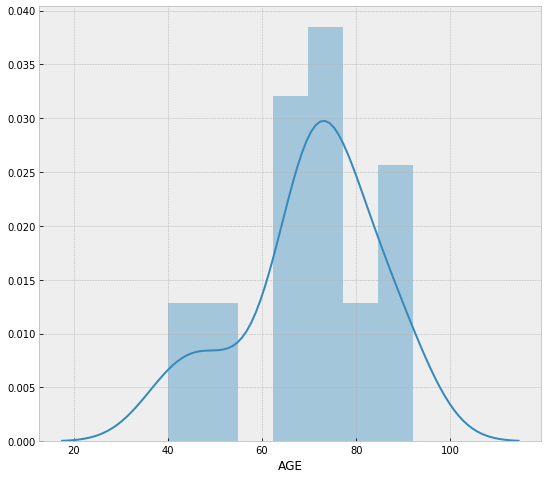

In [12]:
print(df['AGE'].describe())
plt.figure(figsize=(9, 8))
#sns.distplot(df['AGE'], color='g', bins=100, hist_kws={'alpha': 0.4})
sns.distplot(df['AGE'])

In [7]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [3]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

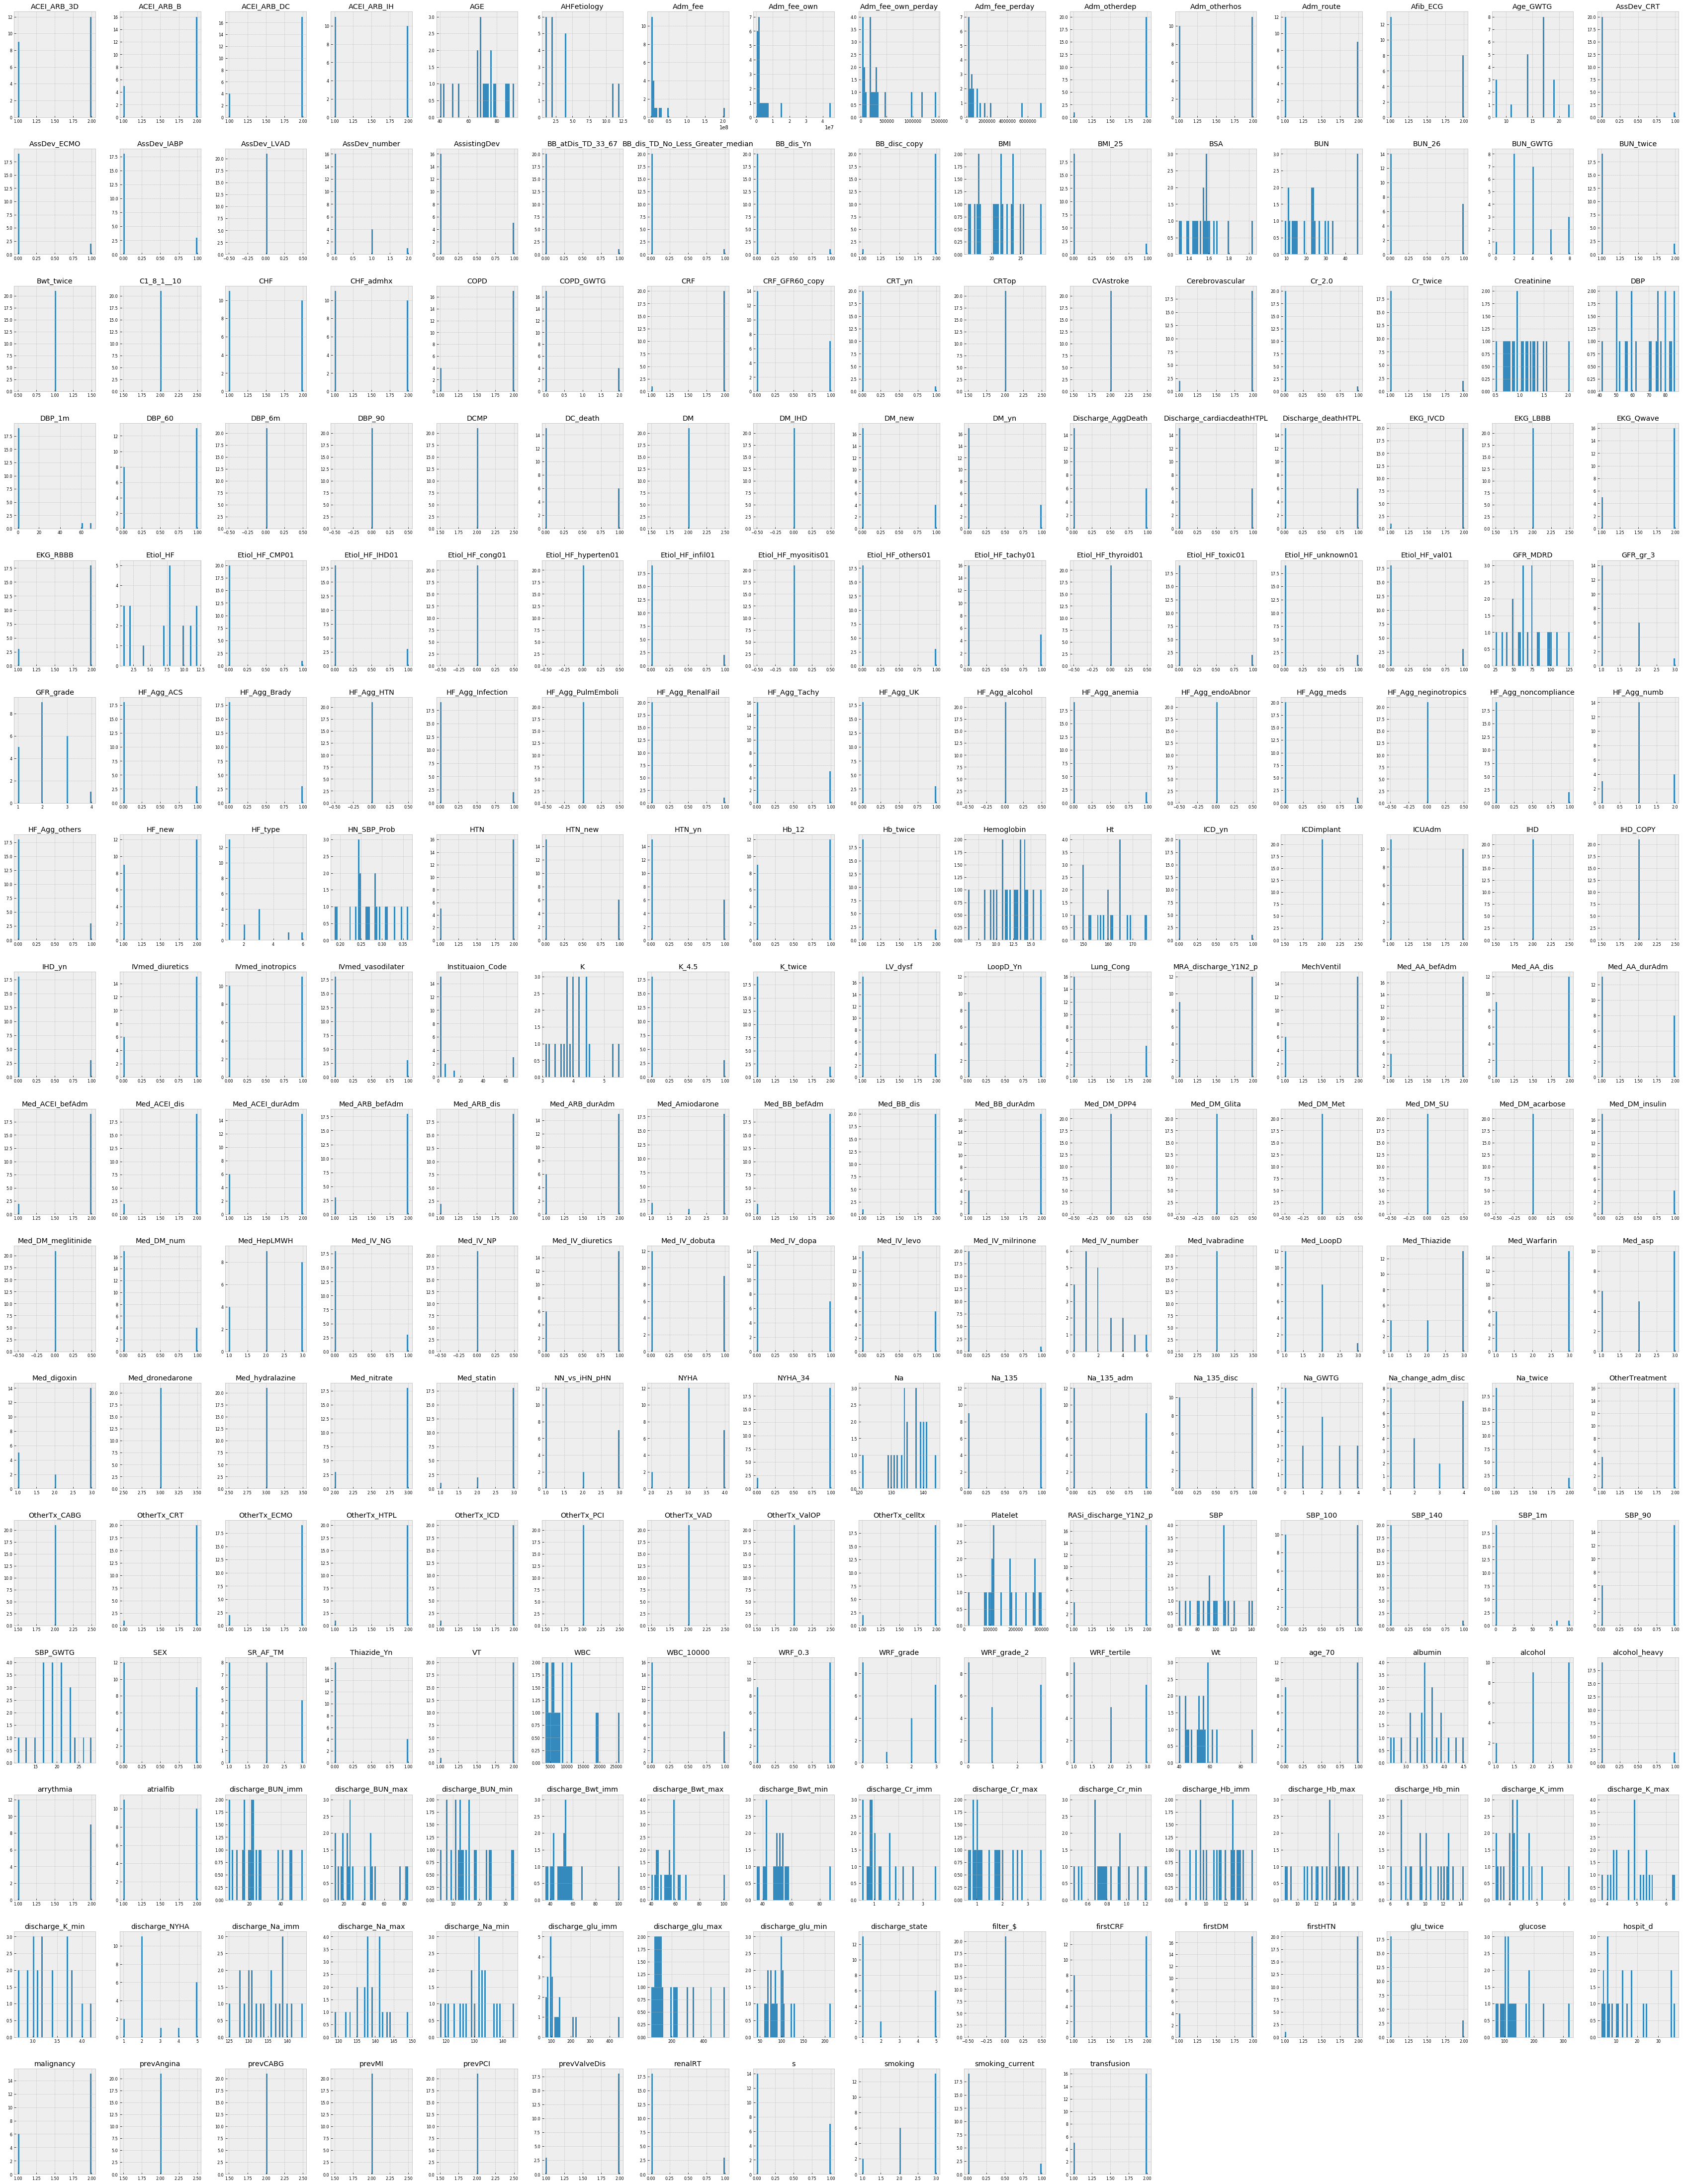

In [36]:
df_num.hist(figsize=(60, 80), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [13]:
df_num_corr = df_num.corr()['discharge_BUN_imm'] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with discharge_BUN_imm:\n{}".format(len(golden_features_list), golden_features_list))

There is 23 strongly correlated values with discharge_BUN_imm:
discharge_BUN_imm    1.000000
discharge_BUN_max    0.727306
discharge_Cr_max     0.680442
discharge_BUN_min    0.656329
WRF_grade_2          0.644227
discharge_glu_max    0.612624
WRF_grade            0.597135
HF_type              0.587043
BUN_26               0.585883
discharge_Cr_imm     0.567459
Adm_fee              0.556525
AssDev_number        0.554789
discharge_NYHA       0.544842
WRF_tertile          0.541119
discharge_state      0.534992
Med_IV_milrinone     0.502602
OtherTx_HTPL        -0.502602
transfusion         -0.516356
AGE                 -0.543685
SR_AF_TM            -0.549403
HF_Agg_numb         -0.563578
HF_Agg_Tachy        -0.564209
Platelet            -0.572917
Name: discharge_BUN_imm, dtype: float64


In [1]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['discharge_BUN_imm'])

NameError: name 'df_num' is not defined